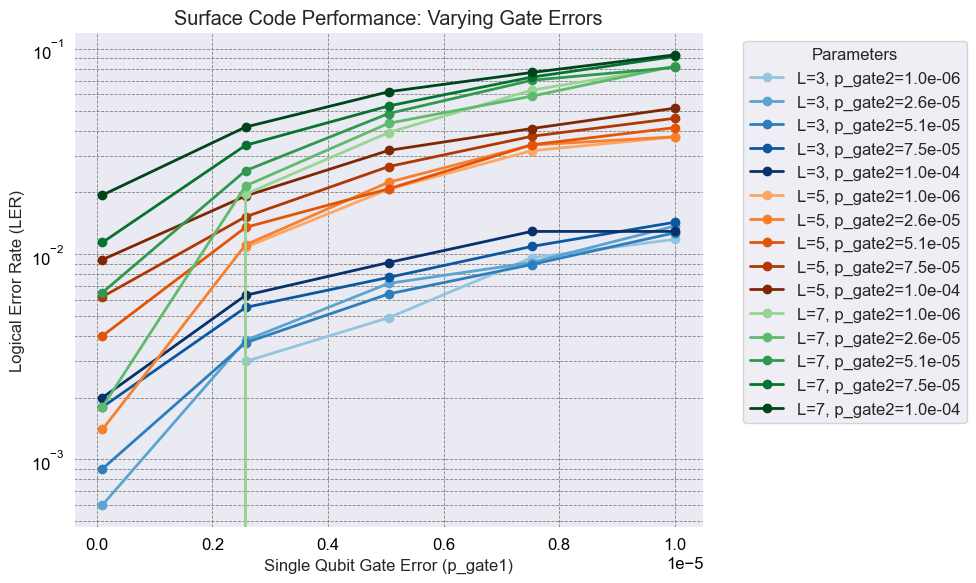

In [1]:
from surface_code import SurfaceCode
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Ls = [3, 5, 7]
p_init = 0.0 # constant 0% SPAM error
p_meas = 0.0 # constant 0.5% measurement error
p_gate1 = np.linspace(0.0000001, 0.00001, 5) # varying 0.1% to 2% single qubit gate error
p_gate2 = np.linspace(0.000001,  0.0001,  5) # varying 0.1% to 2% two qubit gate error
p_idle = 0.0 # constant 0.2% idle error


params = {
    "p_init": p_init,   # 0.5% SPAM error
    "p_meas": p_meas,   # 0.5% Measurement error
    "p_gate1": None,    # 0.1% Single qubit gate error
    "p_gate2": None,    # 0.5% Two qubit gate error (CZ/CNOT)
    "p_idle": p_idle      # Small idle error on data qubits per round
}

results = {}

for L in Ls:
    SC = SurfaceCode(distance=L)
    # Store results as a 2D array: rows=p_gate1, cols=p_gate2
    res_matrix = np.zeros((len(p_gate1), len(p_gate2)))
    
    for i, p in enumerate(p_gate1):
        for j, q in enumerate(p_gate2):
            noise_params = params.copy()
            noise_params["p_gate1"] = p
            noise_params["p_gate2"] = q

            SC.build_in_stim_noisy2(rounds=L+1, noise_params = noise_params, logical_basis="Z")
            ler, syndrome, obs, preds = SC.run_with_pymatching(shots=10000)
            res_matrix[i, j] = ler
            
    results[L] = res_matrix


# Apply scientific plot styling
sns.set_style("darkgrid")
mpl.rcParams.update(
    {
        "font.size": 12,
        "grid.color": "0.5",
        "grid.linestyle": "--",
        "grid.linewidth": 0.6,
        "xtick.color": "black",
        "ytick.color": "black",
    }
)

# Create the plot
plt.figure(figsize=(10, 6))

# Define distinct colormaps for each distance L
# Using sequential colormaps that are distinct from each other
cmaps = ['Blues', 'Oranges', 'Greens', 'Purples', 'Reds']

for i, (L, mat) in enumerate(results.items()):
    # Select a colormap for the current distance L
    cmap_name = cmaps[i % len(cmaps)]
    cmap = plt.get_cmap(cmap_name)
    
    # Generate a range of colors from the colormap for the different p_gate2 values
    # We start at 0.4 to avoid very light/invisible colors
    colors = cmap(np.linspace(0.4, 1.0, len(p_gate2)))
    
    for j, q in enumerate(p_gate2):
        plt.plot(p_gate1, mat[:, j], 
                 label=f"L={L}, p_gate2={q:.1e}", 
                 marker="o", 
                 color=colors[j],
                 linewidth=2)

# Set plot labels and title
plt.xlabel("Single Qubit Gate Error (p_gate1)")
plt.ylabel("Logical Error Rate (LER)")
plt.title("Surface Code Performance: Varying Gate Errors")
plt.yscale('log')
# Place legend outside to avoid cluttering the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Parameters")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

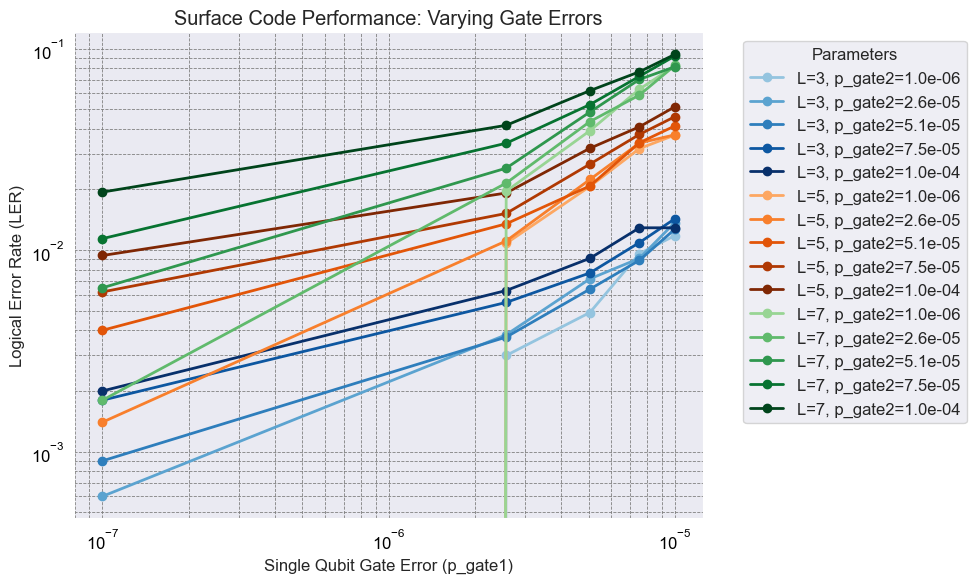

In [2]:
# Create the plot
plt.figure(figsize=(10, 6))

# Define distinct colormaps for each distance L
# Using sequential colormaps that are distinct from each other
cmaps = ['Blues', 'Oranges', 'Greens', 'Purples', 'Reds']

for i, (L, mat) in enumerate(results.items()):
    # Select a colormap for the current distance L
    cmap_name = cmaps[i % len(cmaps)]
    cmap = plt.get_cmap(cmap_name)
    
    # Generate a range of colors from the colormap for the different p_gate2 values
    # We start at 0.4 to avoid very light/invisible colors
    colors = cmap(np.linspace(0.4, 1.0, len(p_gate2)))
    
    for j, q in enumerate(p_gate2):
        plt.plot(p_gate1, mat[:, j], 
                 label=f"L={L}, p_gate2={q:.1e}", 
                 marker="o", 
                 color=colors[j],
                 linewidth=2)

# Set plot labels and title
plt.xlabel("Single Qubit Gate Error (p_gate1)")
plt.ylabel("Logical Error Rate (LER)")
plt.title("Surface Code Performance: Varying Gate Errors")
plt.yscale('log')
plt.xscale('log')
# Place legend outside to avoid cluttering the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Parameters")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()